In [104]:
import numpy as np
from sklearn.linear_model import *
from lineartree import LinearTreeRegressor
import matplotlib.pyplot as plt
import pprint
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
pp = pprint.PrettyPrinter(indent=4)
import time
import lightgbm as lgb

In [105]:
# Read the data from the csv file
data = np.genfromtxt('data/PHTSV_Table_HMAX_Adjusted.csv', delimiter=',')
data = data[1:-1, :]

# 2 D array containing Pressure and Enthalpy data
P_H = data[:, 0:2]

# Scale the pressure to bar and scale the enthalpy to kJ/mol
P_H[:, 0] = P_H[:, 0] / 1e5
P_H[:, 1] = P_H[:, 1] / 1000
minP = np.min(data[:, 0])
maxP = np.max(data[:, 0])
minH = np.min(data[:, 1])
maxH = np.max(data[:, 1])
print(minH)
print(maxH)
print(minP)
print(maxP)

# Vector containing Temperatures
T = data[:, 2]
minT = np.min(T)
maxT = np.max(T)

1.27588638
65.523
1.0
250.0


In [106]:
X_train, X_test, y_train, y_test = train_test_split(P_H, T, test_size=0.2, random_state=42)

# num_iterations

In [149]:
train_data_linear = lgb.Dataset(
    X_train, label=y_train, params={'linear_tree': True, })
lgb_dic = {}
num_iterations = np.arange(20, 110, 10)
for i in range(len(num_iterations)):
    params = {
        "objective": "regression",
        "metric": "rmse",
        "learning_rate": 0.2,
        'num_leaves': 100,
        "verbosity": -1,
        'min_samples_leaf': 8,
        'max_bin': 60,
        'num_iterations': num_iterations[i],
        'max_depth': 8,
    }
    time_start = time.time()
    model_linear = lgb.train(params, train_data_linear)
    time_end = time.time()
    print('time cost:', time_end - time_start, 's')
    y_pred_linear = model_linear.predict(X_test)
    print(
        f"Linear trees error: {round(mean_squared_error(y_test, y_pred_linear),3)}")
    df = model_linear.trees_to_dataframe()
    # len(df[df["right_child"].isnull()]) == len(
    #     df[df["left_child"].isnull()]) == len(df[df["decision_type"].isnull()])
    print('numer of leaves:', 2 * len(df[df["right_child"].isnull()]))
    lgb_dic['model' +
            str(i)] = {'time': time_end - time_start,
                       'mse': round(mean_squared_error(y_test, y_pred_linear), 3),
                       'num_leaves': 2 * len(df[df["right_child"].isnull()])}


c:\Users\shumengl\.conda\envs\omlt\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


time cost: 0.08719348907470703 s
Linear trees error: 3.927
numer of leaves: 4000


c:\Users\shumengl\.conda\envs\omlt\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


time cost: 0.13683748245239258 s
Linear trees error: 0.801
numer of leaves: 6000
time cost: 0.13486862182617188 s
Linear trees error: 0.602


c:\Users\shumengl\.conda\envs\omlt\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


numer of leaves: 8000
time cost: 0.14660978317260742 s
Linear trees error: 0.458


c:\Users\shumengl\.conda\envs\omlt\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


numer of leaves: 9984
time cost: 0.15999245643615723 s
Linear trees error: 0.392


c:\Users\shumengl\.conda\envs\omlt\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


numer of leaves: 11824


c:\Users\shumengl\.conda\envs\omlt\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


time cost: 0.250612735748291 s
Linear trees error: 0.357
numer of leaves: 13582


c:\Users\shumengl\.conda\envs\omlt\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


time cost: 0.27573633193969727 s
Linear trees error: 0.335
numer of leaves: 15178


c:\Users\shumengl\.conda\envs\omlt\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


time cost: 0.2796602249145508 s
Linear trees error: 0.323
numer of leaves: 16924


c:\Users\shumengl\.conda\envs\omlt\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


time cost: 0.2818131446838379 s
Linear trees error: 0.313
numer of leaves: 18490


In [151]:
LT_dic = {}
time_start=time.time()
regr = LinearTreeRegressor(LinearRegression(), criterion='mse', max_bins=60,
                           min_samples_leaf=8, max_depth=8, min_impurity_decrease=0.1)
regr.fit(X_train, y_train)
time_end = time.time()
LT_dic['time'] = time_end - time_start
print('time cost:', LT_dic['time'], 's')
y_pred = regr.predict(X_test)
LT_dic['mse'] = round(mean_squared_error(y_pred, y_test),3)
print(f"Linear trees error: {LT_dic['mse']}")
LT_dic['num_leaves'] = len(regr.summary(only_leaves=True))
print('numer of leaves:', LT_dic['num_leaves'])

time cost: 5.479190826416016 s
Linear trees error: 0.422
numer of leaves: 148


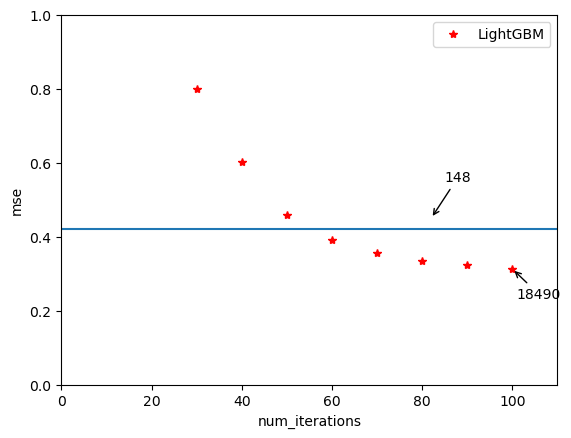

In [152]:
for i in range(len(num_iterations)):
    plt.plot(num_iterations[i], lgb_dic['model'+str(i)]['mse'], 'r*')
    if i == len(num_iterations)-1:
    #     print('last')
        plt.annotate(lgb_dic['model' + str(i)]['num_leaves'],
                    xy=(num_iterations[i], lgb_dic['model' + str(i)]['mse']), 
                    xytext=(num_iterations[i]+1, lgb_dic['model' + str(i)]['mse']-0.08), 
                    arrowprops=dict(arrowstyle="->"))
plt.axhline(y=LT_dic['mse'])
plt.annotate(str(LT_dic['num_leaves']),
             xy=(82, 0.45),
             xytext=(85, 0.55),
             arrowprops=dict(arrowstyle="- >"))
plt.ylim(0, 1)
plt.xlim(0, 110)
plt.ylabel("mse")
plt.xlabel("num_iterations")
plt.legend(labels=['LightGBM'])

# max_bins

In [153]:
max_bins = np.arange(20, 100, 10)
lgb_dic = {}
for i in range(len(max_bins)):
    train_data_linear = lgb.Dataset(
        X_train, label=y_train, params={'linear_tree': True, })
    params = {
        "objective": "regression",
        "metric": "rmse",
        "learning_rate": 0.2,
        'num_leaves': 100,
        "verbosity": -1,
        'min_samples_leaf': 8,
        'max_bin': max_bins[i],
        'num_iterations': 100,
        'max_depth': 8,
    }
    time_start = time.time()
    model_linear = lgb.train(params, train_data_linear)
    time_end = time.time()
    print('time cost:', time_end - time_start, 's')
    y_pred_linear = model_linear.predict(X_test)
    print(
        f"Linear trees error: {round(mean_squared_error(y_test, y_pred_linear),3)}")
    df = model_linear.trees_to_dataframe()
    # len(df[df["right_child"].isnull()]) == len(
    #     df[df["left_child"].isnull()]) == len(df[df["decision_type"].isnull()])
    print('numer of leaves:', 2 * len(df[df["right_child"].isnull()]))
    lgb_dic['model' +
            str(i)] = {'time': time_end - time_start, 
                        'mse': round(mean_squared_error(y_test, y_pred_linear), 3), 
                        'num_leaves': 2 * len(df[df["right_child"].isnull()])}

c:\Users\shumengl\.conda\envs\omlt\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


time cost: 0.5048606395721436 s
Linear trees error: 5.042
numer of leaves: 19586


c:\Users\shumengl\.conda\envs\omlt\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


time cost: 0.3018620014190674 s
Linear trees error: 1.947
numer of leaves: 19788


c:\Users\shumengl\.conda\envs\omlt\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


time cost: 0.4265773296356201 s
Linear trees error: 1.234
numer of leaves: 19456


c:\Users\shumengl\.conda\envs\omlt\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


time cost: 0.3605380058288574 s
Linear trees error: 1.172
numer of leaves: 19484


c:\Users\shumengl\.conda\envs\omlt\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


time cost: 0.35637927055358887 s
Linear trees error: 0.313
numer of leaves: 18490


c:\Users\shumengl\.conda\envs\omlt\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


time cost: 0.29231715202331543 s
Linear trees error: 0.377
numer of leaves: 18254


c:\Users\shumengl\.conda\envs\omlt\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


time cost: 0.3302609920501709 s
Linear trees error: 0.426
numer of leaves: 17898


c:\Users\shumengl\.conda\envs\omlt\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


time cost: 0.29128193855285645 s
Linear trees error: 0.442
numer of leaves: 17908


In [154]:
LT_dic = {}
for i in range(len(max_bins)):
    time_start = time.time()
    regr = LinearTreeRegressor(LinearRegression(), criterion='mse', max_bins=max_bins[i],
                               min_samples_leaf=8, max_depth=8, min_impurity_decrease=0.1)
    regr.fit(X_train, y_train)
    time_end = time.time()
    print('time cost:', time_end - time_start, 's')
    y_pred_linear = regr.predict(X_test)
    print(
        f"Linear trees error: {round(mean_squared_error(y_test, y_pred_linear),3)}")
    df = model_linear.trees_to_dataframe()
    # len(df[df["right_child"].isnull()]) == len(
    #     df[df["left_child"].isnull()]) == len(df[df["decision_type"].isnull()])
    print('numer of leaves:', len(regr.summary(only_leaves=True)))
    LT_dic['model' +
            str(i)] = {'time': time_end - time_start,
                       'mse': round(mean_squared_error(y_test, y_pred_linear), 3),
                       'num_leaves': len(regr.summary(only_leaves=True))}
time_start=time.time()

time cost: 1.570094108581543 s
Linear trees error: 4.998
numer of leaves: 114
time cost: 2.4708054065704346 s
Linear trees error: 2.086
numer of leaves: 151
time cost: 3.4463648796081543 s
Linear trees error: 0.997
numer of leaves: 151
time cost: 4.702179670333862 s
Linear trees error: 1.316
numer of leaves: 148
time cost: 5.638882160186768 s
Linear trees error: 0.422
numer of leaves: 148
time cost: 6.044005632400513 s
Linear trees error: 0.658
numer of leaves: 141
time cost: 7.482273817062378 s
Linear trees error: 0.349
numer of leaves: 144
time cost: 8.699278593063354 s
Linear trees error: 0.456
numer of leaves: 144


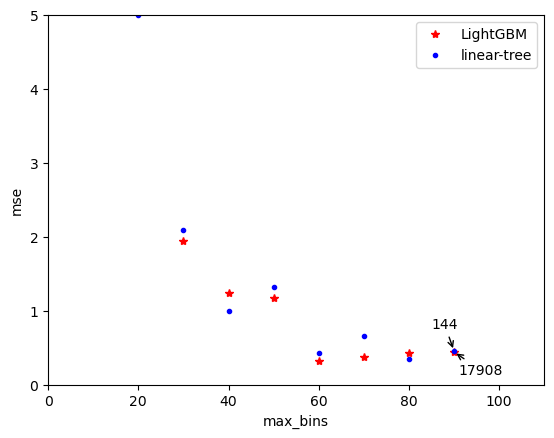

In [171]:
for i in range(len(max_bins)):
    plt.plot(max_bins[i], lgb_dic['model' + str(i)]['mse'], 'r*')
    plt.plot(max_bins[i], LT_dic['model' + str(i)]['mse'], 'b.')
    if i == len(max_bins) - 1:
    #     print('last')
        plt.annotate(lgb_dic['model' + str(i)]['num_leaves'],
                        xy=(max_bins[i], lgb_dic['model' + str(i)]['mse']),
                        xytext=(max_bins[i] + 1,
                                lgb_dic['model' + str(i)]['mse'] - 0.3),
                        arrowprops=dict(arrowstyle="->"))
        plt.annotate(LT_dic['model' + str(i)]['num_leaves'],
                     xy=(max_bins[i], LT_dic['model' + str(i)]['mse']),
                     xytext=(max_bins[i] - 5,
                             LT_dic['model' + str(i)]['mse'] + 0.3),
                     arrowprops=dict(arrowstyle="->"))
plt.ylim(0, 5)
plt.xlim(0, 110)
plt.ylabel("mse")
plt.xlabel("max_bins")
plt.legend(labels=['LightGBM', 'linear-tree'])

# max_depth

In [172]:
max_depth = np.arange(2, 10, 1)
lgb_dic = {}
for i in range(len(max_depth)):
    train_data_linear = lgb.Dataset(
        X_train, label=y_train, params={'linear_tree': True, })
    params = {
        "objective": "regression",
        "metric": "rmse",
        "learning_rate": 0.2,
        'num_leaves': 100,
        "verbosity": -1,
        'min_samples_leaf': 8,
        'max_bin': 60,
        'num_iterations': 100,
        'max_depth': max_depth[i],
    }
    time_start = time.time()
    model_linear = lgb.train(params, train_data_linear)
    time_end = time.time()
    print('time cost:', time_end - time_start, 's')
    y_pred_linear = model_linear.predict(X_test)
    print(
        f"Linear trees error: {round(mean_squared_error(y_test, y_pred_linear),3)}")
    df = model_linear.trees_to_dataframe()
    # len(df[df["right_child"].isnull()]) == len(
    #     df[df["left_child"].isnull()]) == len(df[df["decision_type"].isnull()])
    print('numer of leaves:', 2 * len(df[df["right_child"].isnull()]))
    lgb_dic['model' +
            str(i)] = {'time': time_end - time_start,
                       'mse': round(mean_squared_error(y_test, y_pred_linear), 3),
                       'num_leaves': 2 * len(df[df["right_child"].isnull()])}


c:\Users\shumengl\.conda\envs\omlt\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\shumengl\.conda\envs\omlt\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


time cost: 0.08078241348266602 s
Linear trees error: 33.927
numer of leaves: 800
time cost: 0.06283211708068848 s
Linear trees error: 7.36
numer of leaves: 1598


c:\Users\shumengl\.conda\envs\omlt\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


time cost: 0.0964350700378418 s
Linear trees error: 2.707
numer of leaves: 3096


c:\Users\shumengl\.conda\envs\omlt\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


time cost: 0.11713862419128418 s
Linear trees error: 1.428
numer of leaves: 5954
time cost: 0.1596992015838623 s
Linear trees error: 0.767


c:\Users\shumengl\.conda\envs\omlt\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


numer of leaves: 10632


c:\Users\shumengl\.conda\envs\omlt\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


time cost: 0.30631136894226074 s
Linear trees error: 0.298
numer of leaves: 16128


c:\Users\shumengl\.conda\envs\omlt\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


time cost: 0.38347697257995605 s
Linear trees error: 0.313
numer of leaves: 18490


c:\Users\shumengl\.conda\envs\omlt\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


time cost: 0.31623387336730957 s
Linear trees error: 0.262
numer of leaves: 19826


In [173]:
LT_dic = {}
for i in range(len(max_depth)):
    time_start = time.time()
    regr = LinearTreeRegressor(LinearRegression(), criterion='mse', max_bins=60,
                               min_samples_leaf=8, max_depth=max_depth[i], min_impurity_decrease=0.1)
    regr.fit(X_train, y_train)
    time_end = time.time()
    print('time cost:', time_end - time_start, 's')
    y_pred_linear = regr.predict(X_test)
    print(
        f"Linear trees error: {round(mean_squared_error(y_test, y_pred_linear),3)}")
    df = model_linear.trees_to_dataframe()
    # len(df[df["right_child"].isnull()]) == len(
    #     df[df["left_child"].isnull()]) == len(df[df["decision_type"].isnull()])
    print('numer of leaves:', len(regr.summary(only_leaves=True)))
    LT_dic['model' +
            str(i)] = {'time': time_end - time_start,
                       'mse': round(mean_squared_error(y_test, y_pred_linear), 3),
                       'num_leaves': len(regr.summary(only_leaves=True))}
time_start=time.time()

time cost: 1.0721302032470703 s
Linear trees error: 435.977
numer of leaves: 4
time cost: 1.7143051624298096 s
Linear trees error: 121.699
numer of leaves: 8
time cost: 2.2435243129730225 s
Linear trees error: 36.185
numer of leaves: 16
time cost: 3.4115512371063232 s
Linear trees error: 6.027
numer of leaves: 32
time cost: 4.202237367630005 s
Linear trees error: 1.627
numer of leaves: 60
time cost: 4.886571645736694 s
Linear trees error: 0.751
numer of leaves: 105
time cost: 5.384371042251587 s
Linear trees error: 0.422
numer of leaves: 148
time cost: 5.2307679653167725 s
Linear trees error: 0.401
numer of leaves: 160


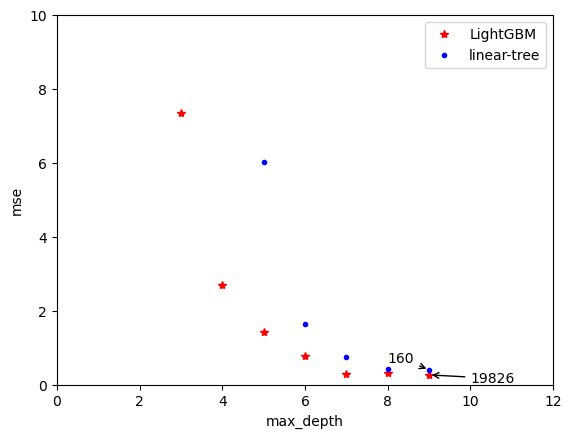

In [182]:
for i in range(len(max_depth)):
    plt.plot(max_depth[i], lgb_dic['model' + str(i)]['mse'], 'r*')
    plt.plot(max_depth[i], LT_dic['model' + str(i)]['mse'], 'b.')
    if i == len(max_bins) - 1:
    #     print('last')
        plt.annotate(lgb_dic['model' + str(i)]['num_leaves'],
                     xy=(max_depth[i], lgb_dic['model' + str(i)]['mse']),
                     xytext=(max_depth[i] + 1,
                                lgb_dic['model' + str(i)]['mse'] - 0.2),
                        arrowprops=dict(arrowstyle="->"))
        plt.annotate(LT_dic['model' + str(i)]['num_leaves'],
                     xy=(max_depth[i], LT_dic['model' + str(i)]['mse']),
                     xytext=(max_depth[i] - 1,
                             LT_dic['model' + str(i)]['mse'] + 0.2),
                     arrowprops=dict(arrowstyle="->"))
plt.ylim(0, 10)
plt.xlim(0, 12)
plt.ylabel("mse")
plt.xlabel("max_depth")
plt.legend(labels=['LightGBM', 'linear-tree'])

# prediction of optimal model

[Tree leaves](https://www.programiz.com/dsa/full-binary-tree) vs MSE
With other information(max_depth or max_bins vs # of iterations)